#Inteligência Artificial - Análise de Clusters



## Carregar Funções

### Importação de Bibliotecas

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
pd.options.display.float_format = '{:.2f}'.format

def make_spider(df_plot):
  num_col = df_plot.columns.difference(["cluster"])
  n_cols = df_plot['cluster'].unique().shape[0]
  df_plot[num_col] /= df_plot[num_col].max()
  df_plot = df_plot.fillna(0)

  palette = plt.cm.get_cmap("Set2", len(df_plot.index))

  categories = list(df_plot)[1:]
  N = len(categories)

  angles = [n/float(N)*2*np.math.pi for n in range(N)]
  angles += angles[:1]

  my_dpi = 96
  fig,axes = plt.subplots(df_plot.shape[0] // n_cols, n_cols, figsize=(1500/my_dpi, 1500/my_dpi), dpi=my_dpi, subplot_kw={"projection" : "polar"})
  axes = axes.ravel()

  for idx, ax in enumerate(axes):
    color = palette(idx)

    row = df_plot.iloc[idx]

    ax.set_theta_offset(np.math.pi / 2)
    ax.set_theta_direction(-1)

    ax.set_xticks(angles[:-1], categories, color="grey", size = 7)

    ax.set_rlabel_position(0)
    ax.set_yticks([0.33,0.66, 0.99], ["0.3", "0.6", "1"], color = "grey", size = 10)
    ax.set_ylim(0,1)

    values = row.drop("cluster").values.flatten().tolist()
    values += values[:1]

    ax.plot(angles, values, color = color, linewidth=1.5, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    ax.set_title(f"Persona {row['cluster']}", size=14, color = color, y=1.1)
  plt.tight_layout()
  plt.show()



---




## **Data Exploration**

### Leitura do CSV e colunas

In [ ]:
path = '/content/BankChurners.csv'

df = pd.read_csv(path, sep=',', decimal=',')
cols = list(df.columns)

### Resumo da base de dados

In [ ]:
n_linhas = df.shape[0]
print(f"A base de dados possui {n_linhas} linhas.")

A base de dados possui 10127 linhas.


In [ ]:
print(f"Amostra de 10 linhas:")
df.sample(10)

Amostra de 10 linhas:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
3781,719455083,Existing Customer,48,F,3,Uneducated,Single,Less than $40K,Blue,39,...,2991,1508,1483,0.703,3734,64,0.882,0.504,0.00055052,0.99945
2922,773503308,Existing Customer,59,M,1,Uneducated,Single,Less than $40K,Blue,53,...,2192,1569,623,0.706,4010,79,0.717,0.716,0.00055621,0.99944
5070,715452408,Existing Customer,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,...,1734,987,747,0.879,4727,67,0.914,0.569,0.00030251,0.9997
7246,711264033,Existing Customer,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,...,4786,1516,3270,0.94,4973,74,0.85,0.317,0.00028744,0.99971
623,718943508,Existing Customer,42,M,3,Unknown,Single,$80K - $120K,Blue,33,...,3714,2170,1544,0.524,1454,35,0.522,0.584,0.00020516,0.99979
3931,778247358,Existing Customer,65,M,1,Graduate,Single,Less than $40K,Blue,56,...,7636,0,7636,0.801,3880,67,0.811,0,0.00016883,0.99983
4767,710431158,Existing Customer,52,F,3,Unknown,Single,Unknown,Blue,36,...,10273,1657,8616,0.71,3778,70,0.591,0.161,6.282e-05,0.99994
7094,715252383,Existing Customer,58,F,2,High School,Divorced,Unknown,Gold,36,...,34516,1864,32652,0.664,3595,52,0.733,0.054,0.00040944,0.99959
3282,717189183,Existing Customer,35,M,1,Doctorate,Single,$40K - $60K,Blue,24,...,10467,1961,8506,0.713,2665,65,0.667,0.187,0.00024431,0.99976
3994,712050933,Attrited Customer,48,M,4,College,Married,$80K - $120K,Blue,32,...,25190,0,25190,0.467,1533,41,0.323,0,0.9949,0.0051


In [ ]:
print("Estatísticas Básicas:")
df.describe(percentiles=[.01, .1, .25, .5, .75, .9, .99])

Estatísticas Básicas:


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,739177606.33,46.33,2.35,35.93,3.81,2.34,2.46,1162.81,4404.09,64.86
std,36903783.45,8.02,1.30,7.99,1.55,1.01,1.11,814.99,3397.13,23.47
min,708082083.00,26.00,0.00,13.00,1.00,0.00,0.00,0.00,510.00,10.00
1%,708304258.50,27.00,0.00,15.00,1.00,1.00,0.00,0.00,869.26,20.00
10%,710160513.00,36.00,1.00,26.00,2.00,1.00,1.00,0.00,1501.00,33.00
25%,713036770.50,41.00,1.00,31.00,3.00,2.00,2.00,359.00,2155.50,45.00
50%,717926358.00,46.00,2.00,36.00,4.00,2.00,2.00,1276.00,3899.00,67.00
75%,773143533.00,52.00,3.00,40.00,5.00,3.00,3.00,1784.00,4741.00,81.00
90%,798512118.00,57.00,4.00,46.00,6.00,3.00,4.00,2228.40,8212.40,92.00


## Análise Manual

### Normalização dos dados

In [ ]:
df['Credit_Limit'] = df['Credit_Limit'].astype(float)
df['Total_Revolving_Bal'] = df['Total_Revolving_Bal'].astype(float)
df['Customer_Age'] = df['Customer_Age'].astype(float)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Credit_Limit', 'Total_Revolving_Bal','Customer_Age']] = scaler.fit_transform(df[['Credit_Limit', 'Total_Revolving_Bal', 'Customer_Age']])

### Seleção de colunas e estatísticas descritivas

In [ ]:
df = df[['Credit_Limit', 'Total_Revolving_Bal', 'Customer_Age']]

In [ ]:
df.describe()

,Credit_Limit,Total_Revolving_Bal,Customer_Age
count,10127.00,10127.00,10127.00
mean,0.22,0.46,0.43
std,0.27,0.32,0.17
min,0.00,0.00,0.00
25%,0.03,0.14,0.32
50%,0.09,0.51,0.43
75%,0.29,0.71,0.55
max,1.00,1.00,1.00


### Especificação de colunas para análise e estatísticas descritivas

In [ ]:
col_corte = ['Credit_Limit', 'Total_Revolving_Bal']

In [ ]:
df[col_corte].describe(percentiles = [.01, .1, .25, .5, .75, .9, .99])

,Credit_Limit,Total_Revolving_Bal
count,10127.00,10127.00
mean,0.22,0.46
std,0.27,0.32
min,0.00,0.00
1%,0.00,0.00
10%,0.01,0.00
25%,0.03,0.14
50%,0.09,0.51
75%,0.29,0.71
90%,0.66,0.89


### Gráfico de dispersão

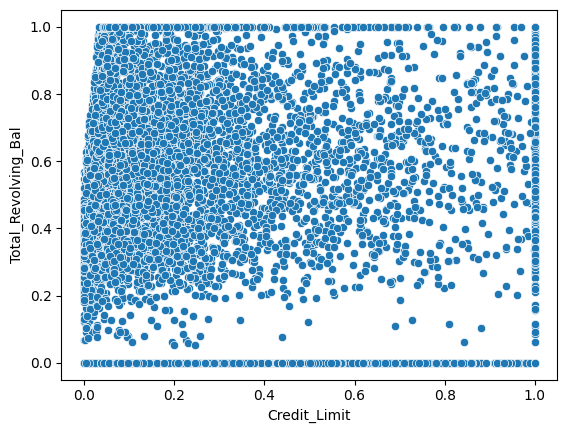

In [ ]:
sns.scatterplot(data = df, x=col_corte[0], y=col_corte[1])
plt.show()

### Gráfico de dispersão com linhas de corte

In [ ]:
vlr_corte = [0.22, 0.46	]

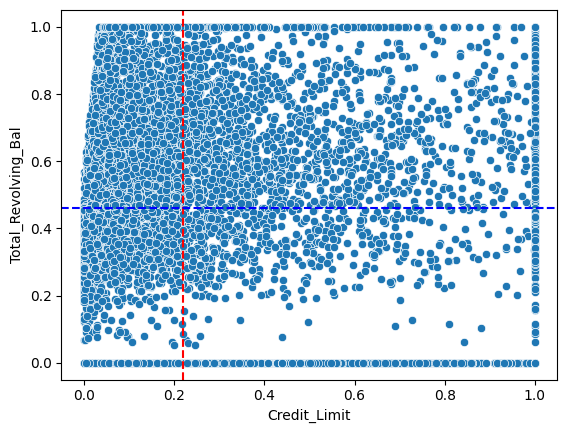

In [ ]:
sns.scatterplot(data = df, x=col_corte[0], y=col_corte[1])

plt.axvline(x=vlr_corte[0], color='r', linestyle='--')
plt.axhline(y=vlr_corte[1], color='b', linestyle='--')

plt.show()

### Segmentação de dados em clusters

In [ ]:
# Cluster 1 (Clientes com baixo crédito e Baixo Saldo Rotativo): "Clientes Conservadores"
#   - Possuem baixo crédito disponível e baixo saldo rotativo, indicando uma preferência por evitar dívidas e gastar pouco.
df1 = df[(df[col_corte[0]] < vlr_corte[0]) & (df[col_corte[1]] < vlr_corte[1])].copy()
df1["cluster"] = "Conservador"

# Cluster 2 (Clientes com Alto Crédito e Alto Saldo Rotativo): "Clientes Gastadores"
#   - Possuem alto crédito disponível e alto saldo rotativo, indicando uma propensão maior a utilizar o crédito e gastar mais.
df2 = df[(df[col_corte[0]] < vlr_corte[0]) & (df[col_corte[1]] >= vlr_corte[1])].copy()
df2["cluster"] = "Consumista"

# Cluster 3 (Clientes com baixo Crédito e Alto Saldo Rotativo): "Clientes com Risco de Inadimplência"
#   - Possuem baixo crédito disponível, porém utilizam grande parte do crédito disponível, indicando um maior risco de não conseguir pagar as suas dívidas.
df3 = df[(df[col_corte[0]] >= vlr_corte[0]) & (df[col_corte[1]] < vlr_corte[1])].copy()
df3["cluster"] = "Moderado"


# Cluster 4 (Clientes com Alto Crédito e Baixo Saldo Rotativo): "Clientes Premium"
#   - Possuem alto crédito disponível e baixo saldo rotativo, indicando uma boa capacidade de pagamento, mas preferem não gastar.
df4 = df[(df[col_corte[0]] >= vlr_corte[0]) & (df[col_corte[1]] >= vlr_corte[1])].copy()
df4["cluster"] = "Premium"

### Criação de tabela de resumo de clusters

In [ ]:
df_cluster1 = pd.concat([df1,df2,df3,df4])
df_cluster_info1 = df_cluster1.groupby("cluster")[['Credit_Limit', 'Total_Revolving_Bal', 'Customer_Age']].median().reset_index()
df_cluster_count1 = df_cluster1.groupby("cluster").count()[col_corte[0]].reset_index()
df_cluster_count1.columns = ["cluster", "count"]

df_cluster_table1 = pd.merge(df_cluster_info1, df_cluster_count1, how="left", on="cluster")

In [ ]:
df_cluster_table1

,cluster,Credit_Limit,Total_Revolving_Bal,Customer_Age,count
0,Conservador,0.04,0.00,0.43,3157
1,Consumista,0.05,0.68,0.43,3815
2,Moderado,0.46,0.00,0.43,1343
3,Premium,0.47,0.68,0.43,1812


### Gráfico de dispersão com clusters

<Axes: xlabel='Credit_Limit', ylabel='Total_Revolving_Bal'>

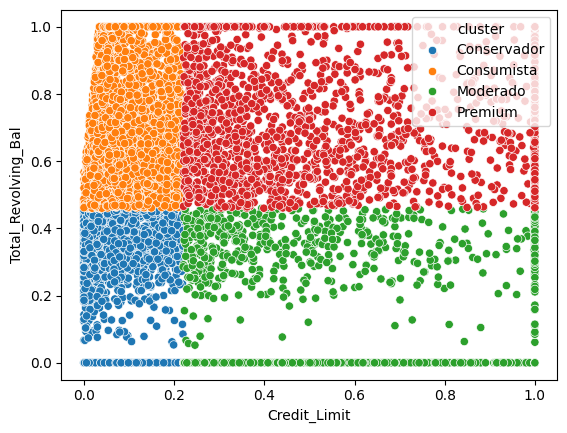

In [ ]:
sns.scatterplot(data = df_cluster1, x=col_corte[0], y=col_corte[1], hue="cluster")

### Criação de gráfico tipo spider (radar) para clusters

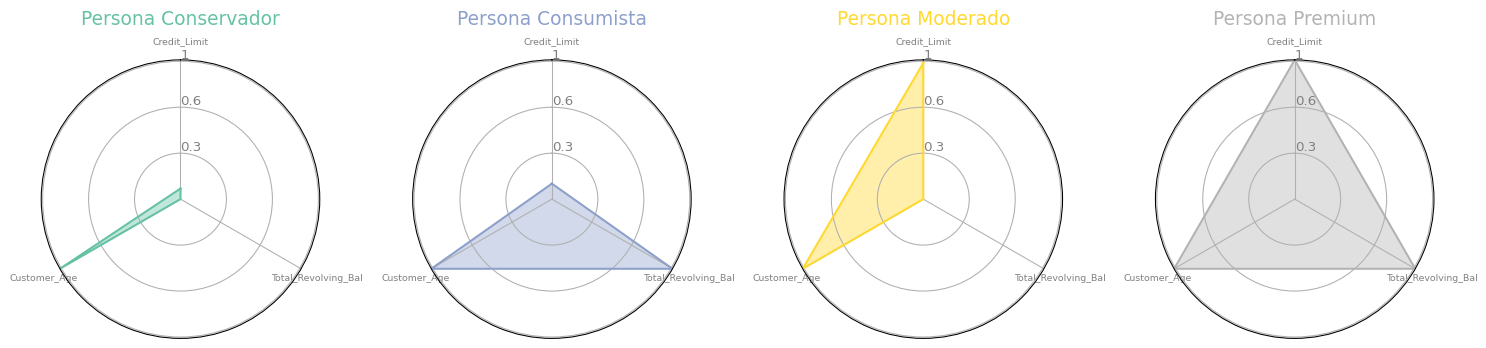

In [ ]:
make_spider(df_cluster_info1)

### Gráfico de barras comparativo por cluster

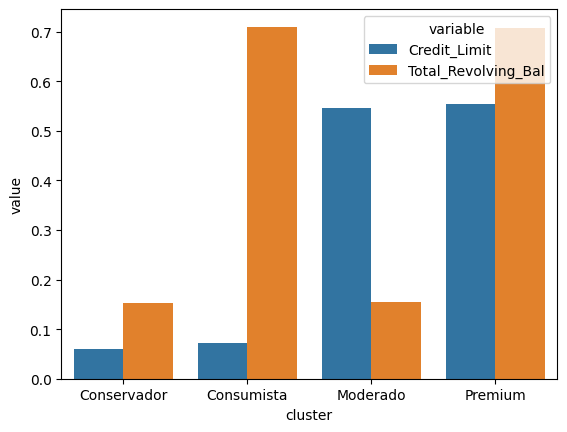

In [ ]:
df_plot1 = df_cluster1.groupby("cluster")[['Credit_Limit', 'Total_Revolving_Bal']].mean().reset_index()
df_plot_melt1 = pd.melt(df_plot1, id_vars=['cluster'], value_vars=['Credit_Limit', 'Total_Revolving_Bal'])

sns.barplot(x='cluster', y='value', hue='variable', data=df_plot_melt1)
plt.show()

## K-means

### Implementação de K-Means com tabela de clusters

In [ ]:
df_cluster2 = df.copy()

kmeans = KMeans(n_clusters = 4, random_state = 42, init = 'k-means++', n_init = 10,
                max_iter=1000, tol = 1e-8, verbose = False)
kmeans.fit(df_cluster2[col_corte])

df_cluster2["cluster"] = kmeans.predict(df_cluster2[col_corte])
df_cluster2["cluster"] = [chr(x+65) for x in df_cluster2.cluster]

In [ ]:
cluster_names = {
    'A': 'Gastador',# Cluster A: Baixo Crédito, Alto Saldo Rotativo
    'B': 'Cauteloso', # Cluster B: Baixo Crédito, Sem Saldo Rotativo
    'C': 'Moderado', # Cluster C: Baixo Crédito, Saldo Rotativo Moderado
    'D': 'Estável'# Cluster D: Alto Crédito, Saldo Rotativo Moderado
}
df_cluster2['cluster'] = df_cluster2['cluster'].map(cluster_names)
df_cluster_info2 = df_cluster2.groupby("cluster").median().reset_index()
df_cluster_count2 = df_cluster2.groupby("cluster").count()[col_corte[0]].reset_index()
df_cluster_count2.columns = ["cluster", "count"]

df_cluster_table2 = pd.merge(df_cluster_info2, df_cluster_count2, how="left", on="cluster")

In [ ]:
df_cluster_table2

,cluster,Credit_Limit,Total_Revolving_Bal,Customer_Age,count
0,Cauteloso,0.07,0.00,0.43,2476
1,Estável,0.86,0.53,0.43,1356
2,Gastador,0.08,0.80,0.43,2823
3,Moderado,0.06,0.48,0.43,3472


### Gráfico de dispersão com clusters K-Means

<Axes: xlabel='Credit_Limit', ylabel='Total_Revolving_Bal'>

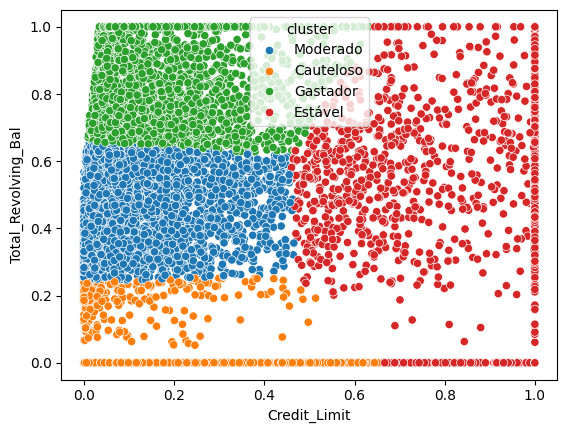

In [ ]:
sns.scatterplot(data = df_cluster2, x=col_corte[0], y=col_corte[1], hue="cluster")

### Gráfico tipo spider (radar) para clusters K-Means

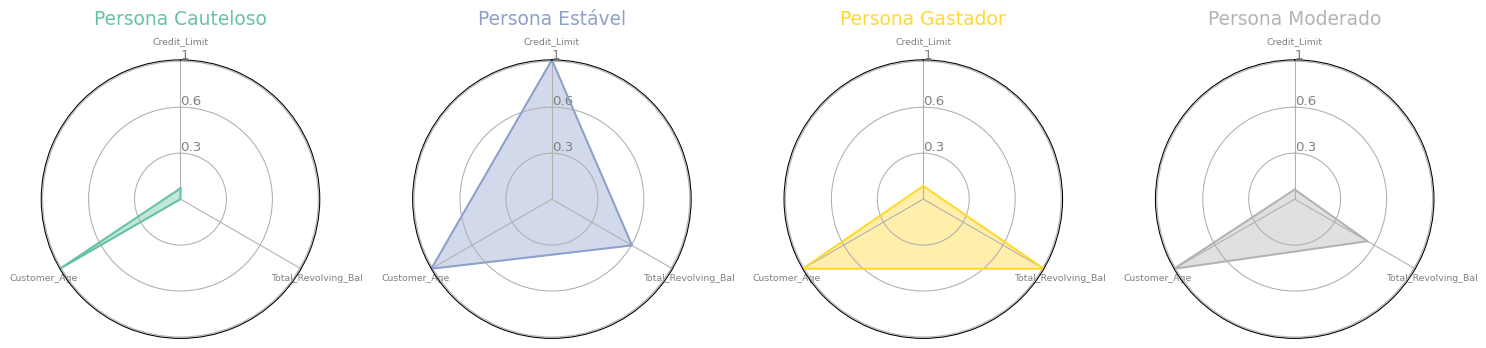

In [ ]:
make_spider(df_cluster_info2)

### Gráfico de barras comparativo por cluster K-Means

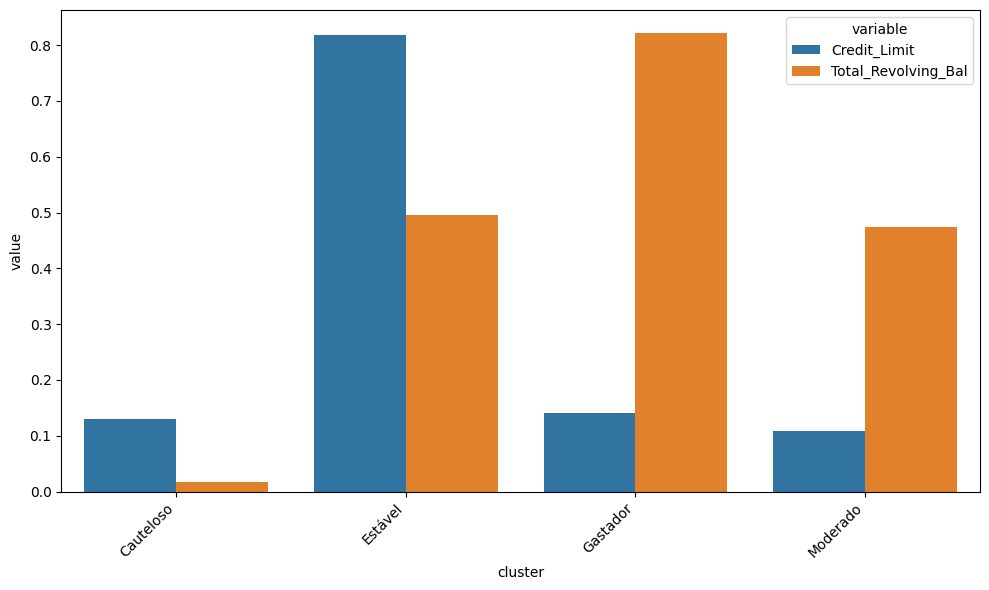

In [ ]:
df_plot2 = df_cluster2.groupby("cluster")[['Credit_Limit', 'Total_Revolving_Bal']].mean().reset_index()

df_plot_melt2 = pd.melt(df_plot2, id_vars=['cluster'], value_vars=['Credit_Limit', 'Total_Revolving_Bal'])

plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura para melhor visualização
sns.barplot(x='cluster', y='value', hue='variable', data=df_plot_melt2)
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para evitar sobreposição
plt.tight_layout()  # Ajusta o layout para evitar que os rótulos sejam cortados
plt.show()

### K-means - Grid Search

### Método do cotovelo para escolha do número ideal de clusters

100%|██████████| 19/19 [00:08<00:00,  2.29it/s]


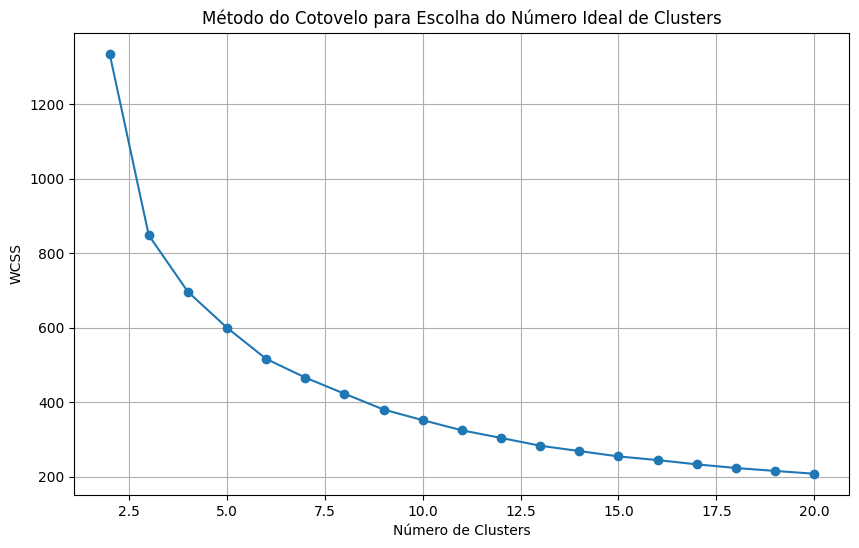

In [ ]:
# Supondo que df_cluster é o seu DataFrame
df_cluster3 = df.copy()

col_corte = ['Credit_Limit', 'Total_Revolving_Bal', 'Customer_Age']

# Lista para armazenar as somas dos quadrados dentro dos clusters para cada k
wcss = []

# Testando k de 2 a 20
for i in tqdm(range(2, 21)):
    kmeans = KMeans(n_clusters = i, random_state = 42, init = 'k-means++', n_init = 10,
                max_iter=1000, tol = 1e-8)
    kmeans.fit(df_cluster3[col_corte])
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), wcss, marker='o')
plt.title('Método do Cotovelo para Escolha do Número Ideal de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


### Aplicação de K-Means com 5 clusters e criação de tabela resumo

In [ ]:
df_cluster3 = df.copy()


col_corte = ['Credit_Limit', 'Total_Revolving_Bal', 'Customer_Age']
i = 5
kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++', n_init=10,
                 max_iter=1000, tol=1e-8)


kmeans.fit(df_cluster3[col_corte])
df_cluster3["cluster"] = kmeans.predict(df_cluster3[col_corte])
df_cluster3["cluster"] = [chr(x + 65) for x in df_cluster3["cluster"]]

cluster_names = {
    'A': 'Cauteloso',   # Persona A: Baixo Crédito, Uso Moderado
    'B': 'Gastador',    # Baixo Crédito, Alto Uso
    'C': 'Conservador',  # Alto Crédito, Sem Uso
    'D': 'Evita Crédito',    # Baixo Crédito, Sem Uso
    'E': 'Premium',      # Alto Crédito, Alto Uso
}

df_cluster3['cluster'] = df_cluster3['cluster'].map(cluster_names)
df_cluster_info3 = df_cluster3.groupby("cluster").median().reset_index()
df_cluster_count3 = df_cluster3.groupby("cluster").count()[col_corte[0]].reset_index()
df_cluster_count3.columns = ["cluster", "count"]

df_cluster_table3 = pd.merge(df_cluster_info3, df_cluster_count3, how="left", on="cluster")
df_cluster_table3

,cluster,Credit_Limit,Total_Revolving_Bal,Customer_Age,count
0,Cauteloso,0.06,0.48,0.43,3429
1,Conservador,0.71,0.00,0.45,633
2,Evita Crédito,0.05,0.00,0.43,2286
3,Gastador,0.07,0.80,0.43,2757
4,Premium,0.77,0.66,0.43,1022


### Gráfico 3D de dispersão com clusters

In [ ]:
col_corte = ['Credit_Limit', 'Total_Revolving_Bal', 'Customer_Age']

import plotly.express as px

# Supondo que 'col_corte' tenha três colunas
fig = px.scatter_3d(df_cluster3,
                    x=col_corte[0],
                    y=col_corte[1],
                    z=col_corte[2],
                    color='cluster')

# Salvando o gráfico em um arquivo HTML
fig.write_html("grafico_clusters_3d.html")

# Exibindo o gráfico
fig.show()

### Gráfico de dispersão com clusters (2D)

<Axes: xlabel='Credit_Limit', ylabel='Total_Revolving_Bal'>

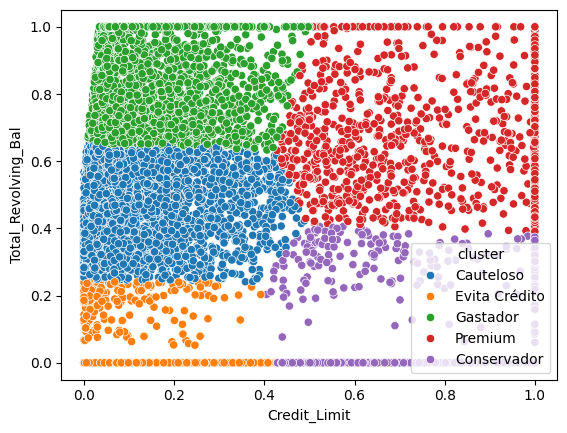

In [ ]:

# Gráfico de dispersão com clusters K-Means
sns.scatterplot(data = df_cluster3, x=col_corte[0], y=col_corte[1], hue="cluster")

### Gráfico tipo spider (radar) para clusters K-Means com 5 clusters

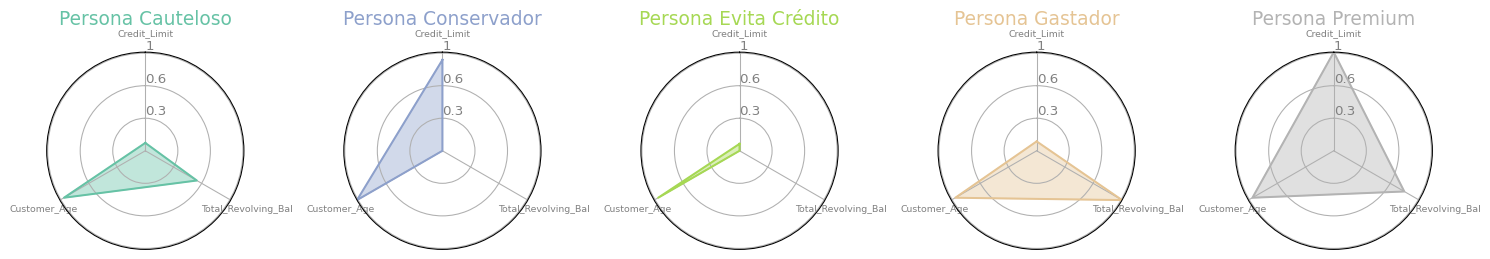

In [ ]:
# Gráfico tipo spider (radar) para clusters K-Means
make_spider(df_cluster_info3)

### Gráfico de barras comparativo por clusters K-Means com 5 clusters

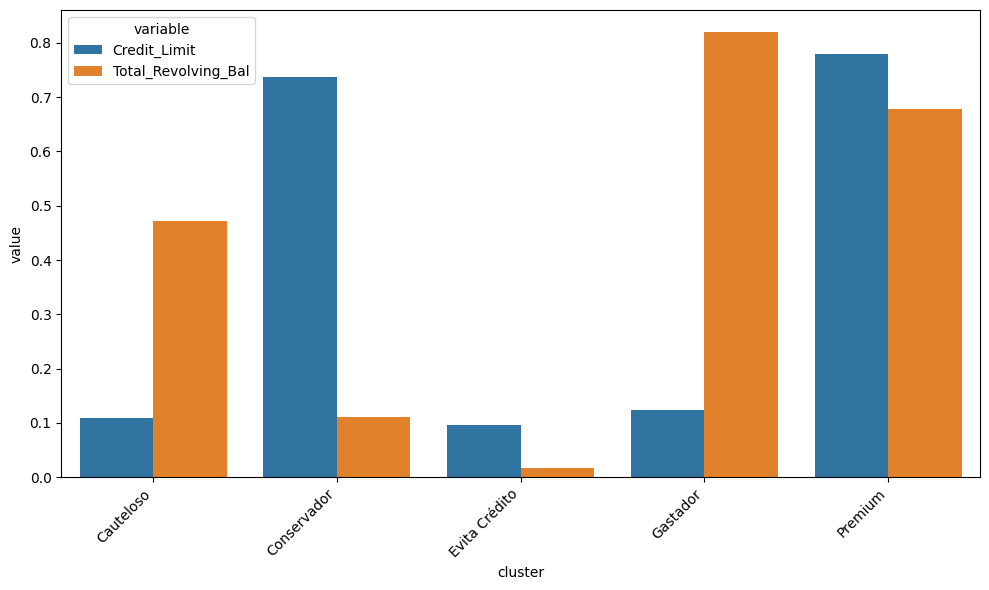

In [ ]:
df_plot3 = df_cluster3.groupby("cluster")[['Credit_Limit', 'Total_Revolving_Bal']].mean().reset_index()

df_plot_melt3 = pd.melt(df_plot3, id_vars=['cluster'], value_vars=['Credit_Limit', 'Total_Revolving_Bal'])

plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura para melhor visualização
sns.barplot(x='cluster', y='value', hue='variable', data=df_plot_melt3)
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para evitar sobreposição
plt.tight_layout()  # Ajusta o layout para evitar que os rótulos sejam cortados
plt.show()
